In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
#checking missing values
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
final_dataset['Current_year']=2020

In [15]:
final_dataset['no_of_years']=final_dataset['Current_year']-final_dataset['Year']

In [16]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
final_dataset.drop(final_dataset[['Year','Current_year']],axis=1,inplace=True)

In [18]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


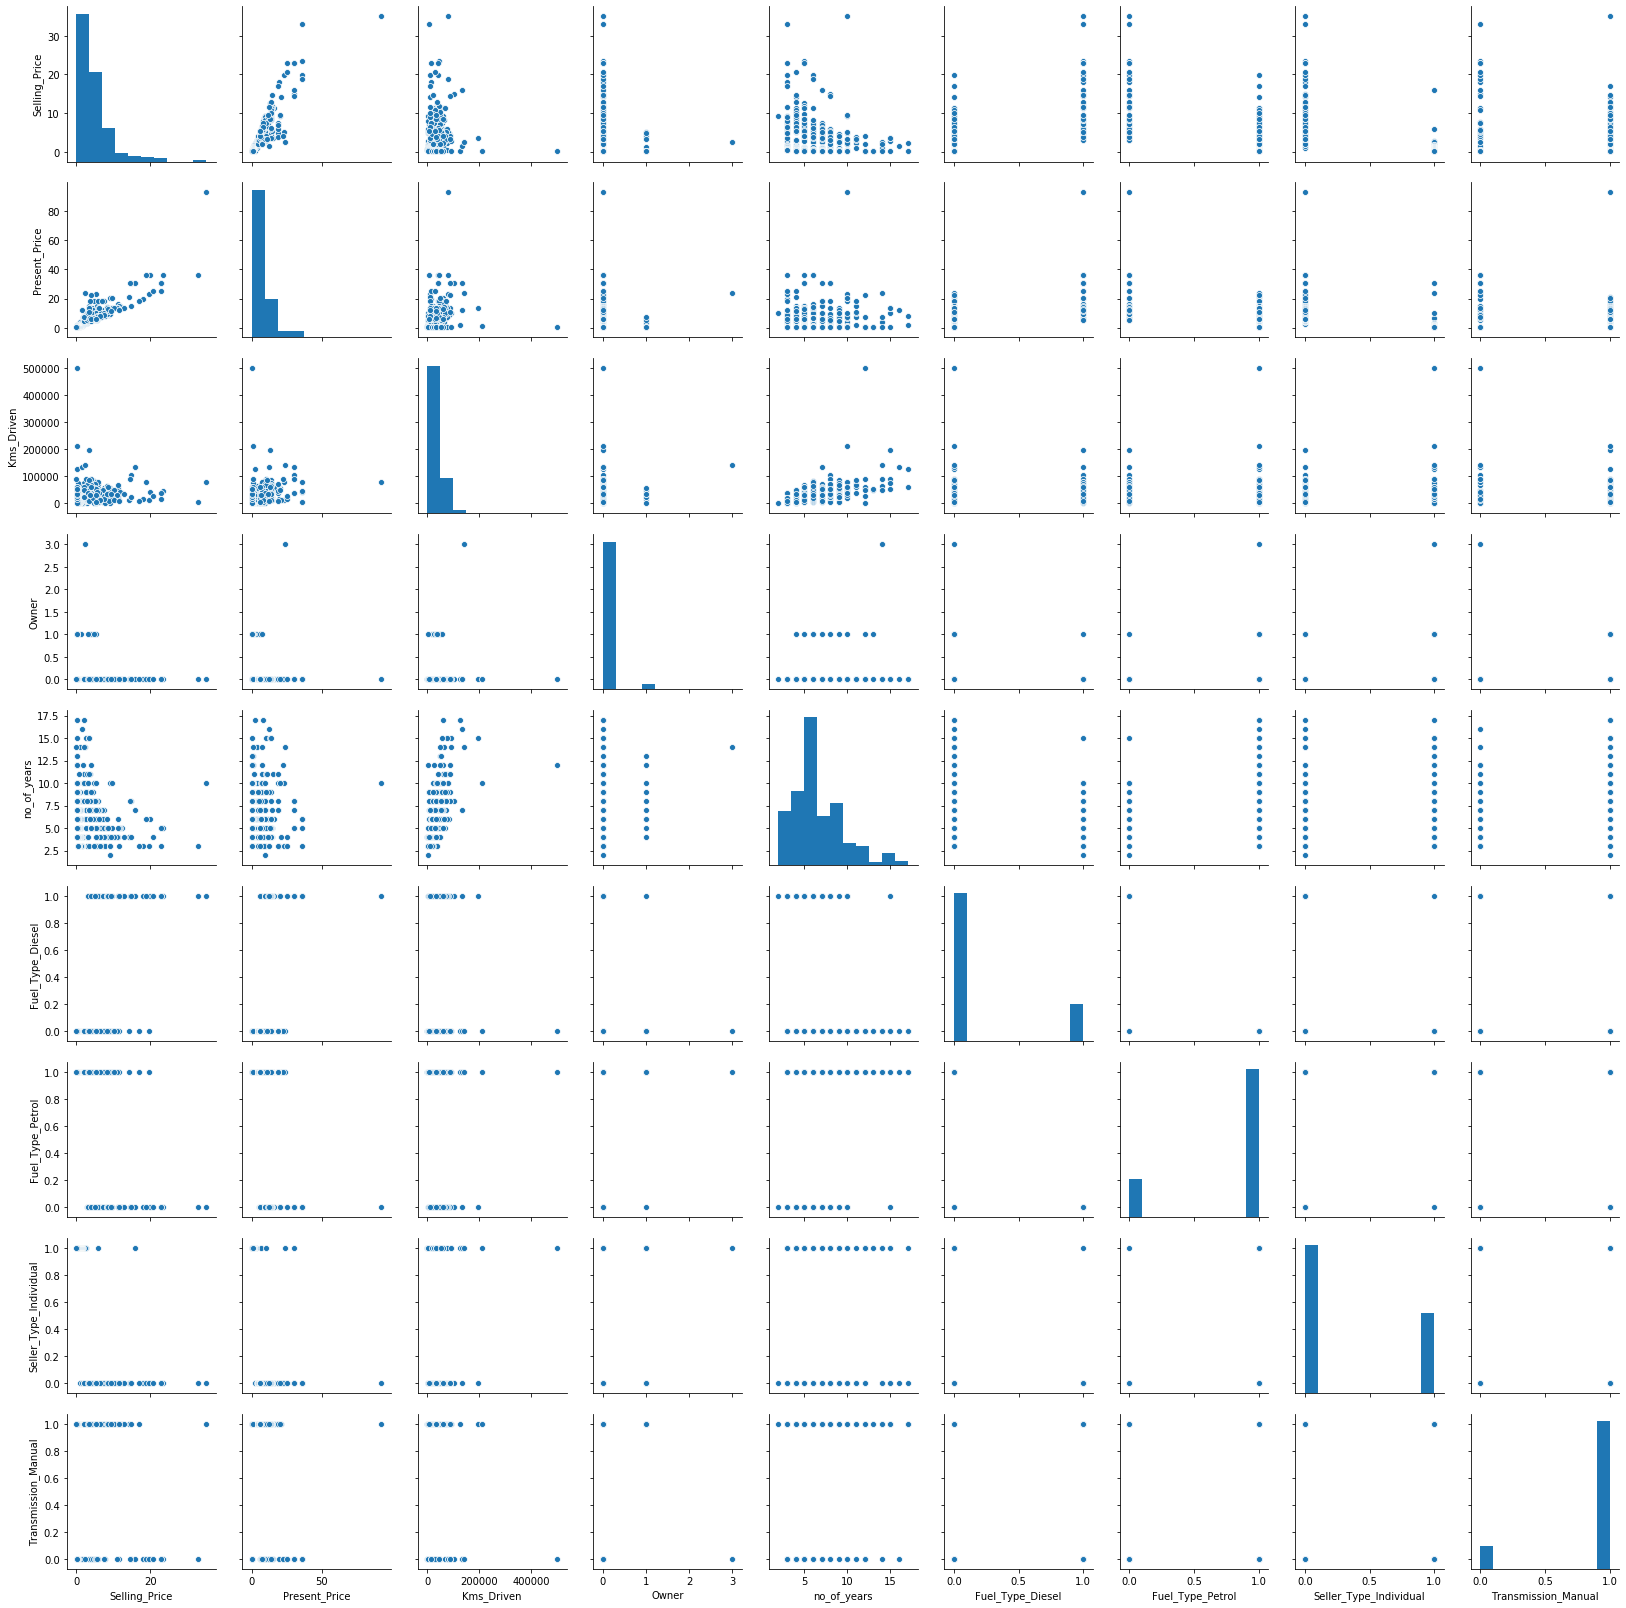

In [22]:
sns.pairplot(final_dataset)

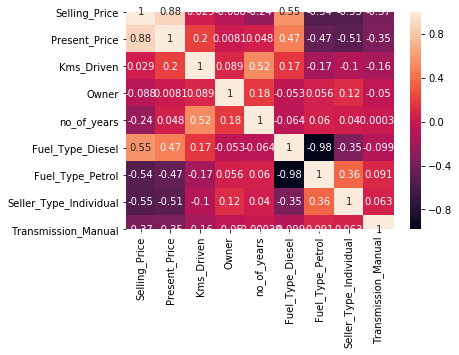

<Figure size 1440x1440 with 0 Axes>

In [29]:
sns.heatmap(final_dataset.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [35]:
#independent and dependent features

X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
#feature importance
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [41]:
print(model.feature_importances_)

[3.88427438e-01 3.59411028e-02 3.71769866e-04 7.93686441e-02
 2.29414394e-01 1.14120370e-02 1.19356403e-01 1.35708211e-01]


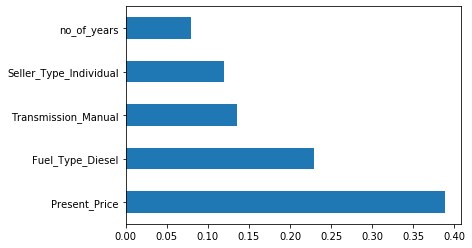

In [42]:
#graph for checking feature importances
important_feature=pd.Series(model.feature_importances_,index=X.columns)
important_feature.nlargest(5).plot(kind='barh')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
#no of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#no of features to consider at every split
max_features=['auto','sqrt']

#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

#minimum number of samples required to split a node
minimum_samples_split=[2,5,10,15,100]

#minimum number of samples required at each leaf node
minimum_samples_leaf=[1,2,5,10]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#create the random grid
random_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':minimum_samples_split,
            'min_samples_leaf':minimum_samples_leaf}

In [51]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [52]:
#creating base model
rf=RandomForestRegressor()


In [53]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=3)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=30, total=   0.3s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_depth=20, total=   0.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_depth=20, total=   0.7s
[CV] n_estimators=500, min_samples_split

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_depth=20, total=   1.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [55]:
predictions=rf_random.predict(X_test)

In [56]:
predictions

array([ 1.54038889,  0.7161    ,  5.99742222,  0.40468889,  6.64046667,
        1.11668889,  8.20241111,  2.78544444,  9.40286667,  0.70443333,
       22.57255556,  7.03461111,  0.42876667,  4.46977778, 24.8555    ,
        4.84405556,  3.66294444,  2.73266667,  1.52872222,  0.45448889,
        3.32138889,  1.61852222,  7.02303333,  0.47374444,  5.27966667,
        0.76747778,  4.99003333,  2.76422222,  1.07738889,  0.57224444,
        7.97577778,  6.87412222,  1.02298889,  2.78472222,  2.19345556,
       10.26268889,  2.96805556,  0.35718889,  1.0097    ,  4.40016667,
        3.00505556,  0.60123333,  0.63513333,  5.72922222,  3.11317778,
        0.55547778,  7.14878889,  8.63688889,  8.47575556,  9.37637778,
        3.97031111,  4.42316667,  2.68966667,  7.43983333,  0.33986667,
        2.88844444,  0.13196667,  0.5532    ,  7.27994444,  5.03534444,
        2.76866667])

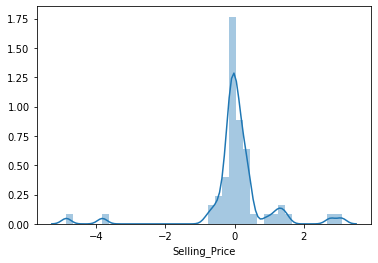

In [57]:
sns.distplot(y_test-predictions)

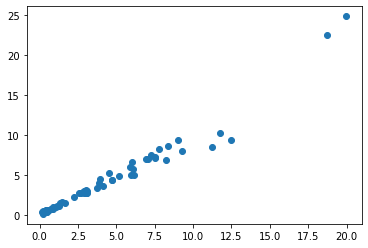

In [58]:
plt.scatter(y_test,predictions)

As we see the scatter plot is linear i.e our model is predicting well.